# **TESLA Stock Movement Analysis Using Sentiment Analysis**

## Importing libraries

In [4]:
!pip install demoji
!pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 3.1 MB/s eta 0:00:00


In [6]:
import pandas as pd
import demoji
import re
import string
from nltk.corpus import stopwords,wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
from nltk import pos_tag
import attr
import nltk
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax
import torch
from sklearn.utils import resample
import yfinance as yf
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import LSTM,Conv1D,Conv2D,MaxPooling2D,MaxPooling1D,Flatten
from keras.layers import Dense, Dropout
import pandas as pdimport
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
from tensorflow.keras.layers import LSTM, Bidirectional
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification
from torch.optim import AdamW
from sklearn.model_selection import train_test_split
from torch.nn import CrossEntropyLoss
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns


Downloading the data required for nltk

In [7]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [ ]:
!pip install praw

#Web Scraping Reddit social media platform
I tried to web scrape testla tweets using the below code but since there is limitation that we can only web scrape 100 posts from the api, I wasn't able to web scrape sufficient posts so I used the data that was available. The code below is the attempt to get posts from reddit api but even that doesn't allow a lot of posts.



In [ ]:
import praw
import pandas as pd

# Replace the following with your own Reddit API credentials
CLIENT_ID = "fqSeJ2TPv-v9Q9UauCvCMQ"
CLIENT_SECRET = "5z4MqPYODA5vAyYyO86kXd0ng0Xz4Q"
USER_AGENT = "web"

def fetch_reddit_posts_with_keywords(subreddit_names, keywords, limit=1000):
    # Initialize the Reddit client
    reddit = praw.Reddit(
        client_id=CLIENT_ID,
        client_secret=CLIENT_SECRET,
        user_agent=USER_AGENT

    )

    # Fetch posts from the specified subreddit
    filtered_posts = []
    keyword_lower = [keyword.lower() for keyword in keywords]

    for subreddit_name in subreddit_names:
        subreddit = reddit.subreddit(subreddit_name)
        posts = subreddit.new(limit=limit)  # Fetch recent posts (you can also use .hot or .top)

        # Filter posts containing the specified keywords in their title
        for post in posts:
            if any(keyword in post.title.lower() for keyword in keyword_lower):
                filtered_posts.append({
                    "title": post.title,
                    "url": post.url,
                    "score": post.score,
                    "id": post.id,
                    "subreddit": post.subreddit.display_name,
                    "created_utc": post.created_utc
                })

    return filtered_posts

if __name__ == "__main__":
    subreddit_name = ["wallstreetbets", "stocks","technology"]  # You can specify subreddits
    keywords = ["Tesla", "TSLA", "Elon", "Musk"]  # Replace with your keywords
    posts = fetch_reddit_posts_with_keywords(subreddit_name, keywords)

    # Create a DataFrame from the posts
    df = pd.DataFrame(posts)

    # Convert created_utc to a readable date format
    if 'created_utc' in df.columns:
        df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

    print(f"Found {len(posts)} posts with keywords: {keywords}")
    df.head()


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Found 82 posts with keywords: ['Tesla', 'TSLA', 'Elon', 'Musk']


In [ ]:
df.head()

,title,url,score,id,subreddit,created_utc
0,Musk’s Record Pay Plan Is A 12% Dilution of $TSLA,https://www.reddit.com/r/wallstreetbets/commen...,9,1h8lhhp,wallstreetbets,2024-12-07 05:23:08
1,$TSLA gain 51.6k,https://www.reddit.com/r/wallstreetbets/commen...,57,1h8d8ux,wallstreetbets,2024-12-06 22:12:15
2,35k+ on TSLA Calls - can we 🌕???,https://i.redd.it/jjwzwvevga5e1.jpeg,12,1h8b1ib,wallstreetbets,2024-12-06 20:34:34
3,"Tesla -2x fund $8,000",https://i.redd.it/azegxnisf95e1.jpeg,4,1h866hw,wallstreetbets,2024-12-06 17:06:43
4,$TSLA $29.4K 400call 12/13 YOLO,https://www.reddit.com/r/wallstreetbets/commen...,62,1h7lka7,wallstreetbets,2024-12-05 22:19:08


#Building my own Sentiment Analysis Model for twitter tweets using BERT

## Text Pre-processing
I used the dataset of 20 thousand Twitter tweets available on kaggle to build sentiment analysis model. This is the code to preprocess the tweets to build sentiment analysis model.

In [ ]:
# This function is used to pass the POS tage for each word passed through clean_text function
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

# Cleaning tweets
def clean_text(text):
    # Initialization the twitter tokenizer
    tk = TweetTokenizer(preserve_case=False, strip_handles=True,reduce_len=True)
    # Initialization the lemmatizer
    lemmatizer = WordNetLemmatizer()
    # Trying to avoid deleting the negative verbs as it affects the meaning of the tweets.
    stop_words = stopwords.words('english') + ["i'll","i'm", "should", "could"]
    negative_verbs = [ "shan't",'shouldn',"shouldn't",'wasn','weren','won','wouldn','aren','couldn','didn','doesn','hadn','hasn','haven','isn','ma','mightn','mustn',"mustn't",'needn',"needn't","wouldn't","won't","weren't","wasn't","couldn","not","nor","no","mightn't","isn't","haven't","hadn't","hasn't","didn't","doesn't","aren't","don't","couldn't","never"]
    stop_words =[word for word in stop_words if word not in negative_verbs ]

    # Lowering tweets
    lower_tweet = text.lower()
    # Removing hashtag and cashtag symbolsx
    tweet = re.sub(r"[#$]"," ",lower_tweet)
    # Removing links from tweets
    tweet = re.sub(r"https?:\/\/.*[\r\n]*"," ", tweet)
    # Translating emojies into thier descriptions
    tweet = demoji.replace_with_desc(tweet)
    # removing numerical values
    tweet = re.sub(r"[0-9]|-->","",tweet)
    # Tokenize the tweets by twitter tokenzier.
    tweet = tk.tokenize(tweet)
    # Choosing the words that don't exist in stopwords, thier lengths are more than 2 letters and then lemmatize them.
    tweet = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tweet if word not in stop_words and word not in string.punctuation and len(word)>2 and "." not in word]
    # return the tokens in one sentence
    tweet = " ".join(tweet)

    return tweet
data['cleaned'] = data['full_text'].apply(lambda x : clean_text(x))
data.to_csv('cleaned_data.csv', index = False)


# Sentiment analysis

## Creating my own model using BERT for vectorisation
BERT is an advanced model that excels in sentiment analysis due to its ability to understand context, pre-trained knowledge, and adaptability through fine-tuning. Its robustness and ability to handle complex linguistic structures make it a preferred choice for building highly accurate sentiment analysis systems.

In [ ]:
class BERTSentimentAnalysis:
    def __init__(self,
                 pretrained_model='bert-base-uncased',
                 max_length=128,
                 batch_size=32):
        """
        Initialize BERT Sentiment Analysis model for binary classification
        """
        self.pretrained_model = pretrained_model
        self.max_length = max_length
        self.batch_size = batch_size

        # Load BERT tokenizer and model
        self.tokenizer = BertTokenizer.from_pretrained(pretrained_model)
        self.model = None
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    def preprocess_text(self, texts):
        """
        Preprocess text using BERT tokenizer
        """
        texts = [str(text).strip() for text in texts]

        # Tokenize texts
        encodings = self.tokenizer(
            texts,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encodings['input_ids'],
            'attention_mask': encodings['attention_mask']
        }

    def prepare_dataset(self, df, text_column, label_column):
        """
        Prepare dataset for BERT training
        """
        # Remove duplicates and handle potential issues
        df = df.drop_duplicates(subset=[text_column])
        df = df.dropna(subset=[text_column, label_column])

        print("Dataset Details:")
        print(f"Total rows: {len(df)}")
        print(f"Unique texts: {df[text_column].nunique()}")
        print(f"Label distribution:\n{df[label_column].value_counts(normalize=True)}")

        if len(df) > 50000:
            print("Large dataset detected. Sampling 50,000 rows...")
            df = df.sample(n=50000, random_state=42)

        # Preprocess texts
        inputs = self.preprocess_text(df[text_column])

        # Prepare labels
        labels = df[label_column].values

        # Split data
        X_train_ids, X_val_ids, X_train_mask, X_val_mask, y_train, y_val = train_test_split(
            inputs['input_ids'].numpy(),
            inputs['attention_mask'].numpy(),
            labels,
            test_size=0.2,
            random_state=42,
            stratify=labels
        )

        # Convert to TensorFlow tensors
        X_train_ids = torch.tensor(X_train_ids, dtype=torch.long)
        X_train_mask = torch.tensor(X_train_mask, dtype=torch.long)
        X_val_ids = torch.tensor(X_val_ids, dtype=torch.long)
        X_val_mask = torch.tensor(X_val_mask, dtype=torch.long)
        y_train = torch.tensor(y_train, dtype=torch.long)
        y_val = torch.tensor(y_val, dtype=torch.long)

        # Convert to TensorFlow datasets
        train_dataset = TensorDataset(X_train_ids, X_train_mask, y_train)
        val_dataset = TensorDataset(X_val_ids, X_val_mask, y_val)

        return train_dataset, val_dataset

    def build_model(self, num_classes=2):
        """
        Build BERT model for binary sequence classification
        """
        # Load pre-trained BERT model
        self.model = BertForSequenceClassification.from_pretrained(
            self.pretrained_model,
            num_labels=num_classes
        )
        self.model.to(self.device)

        return self.model

    def train(self, train_dataset, val_dataset, epochs=3):
        """
        Train the BERT model using standard callbacks
        """
        train_loader = DataLoader(train_dataset, batch_size=self.batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=self.batch_size)

        optimizer = AdamW(self.model.parameters(), lr=2e-5)
        loss_fn = CrossEntropyLoss()

        best_val_accuracy = 0.0
        for epoch in range(epochs):
            self.model.train()
            total_loss = 0
            correct_predictions = 0
            total_predictions = 0

            for batch in train_loader:
                input_ids, attention_mask, labels = [item.to(self.device) for item in batch]

                # Zero gradients
                optimizer.zero_grad()

                # Forward pass
                outputs = self.model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
                loss = outputs.loss
                logits = outputs.logits

                # Backward pass
                loss.backward()
                optimizer.step()

                total_loss += loss.item()

                # Calculate accuracy
                _, predicted = torch.max(logits, dim=1)
                correct_predictions += (predicted == labels).sum().item()
                total_predictions += labels.size(0)

            avg_train_loss = total_loss / len(train_loader)
            train_accuracy = correct_predictions / total_predictions

            # Evaluate model
            self.model.eval()
            val_loss = 0
            correct_predictions = 0
            total_predictions = 0

            with torch.no_grad():
                for batch in val_loader:
                    input_ids, attention_mask, labels = [item.to(self.device) for item in batch]
                    outputs = self.model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
                    loss = outputs.loss
                    logits = outputs.logits
                    val_loss += loss.item()

                    _, predicted = torch.max(logits, dim=1)
                    correct_predictions += (predicted == labels).sum().item()
                    total_predictions += labels.size(0)

            avg_val_loss = val_loss / len(val_loader)
            val_accuracy = correct_predictions / total_predictions

            print(f"Epoch {epoch+1}/{epochs} - Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")
            print(f"Epoch {epoch+1}/{epochs} - Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

            if val_accuracy > best_val_accuracy:
                best_val_accuracy = val_accuracy
                print("Saving best model...")
                torch.save(self.model.state_dict(), 'best_bert_model.pth')

    def predict(self, texts):
        """
        Predict sentiment for given texts
        """
        self.model.eval()

        inputs = self.preprocess_text(texts)

        input_ids = inputs['input_ids'].to(self.device)
        attention_mask = inputs['attention_mask'].to(self.device)

        with torch.no_grad():
            outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits

        probabilities = torch.nn.functional.softmax(logits, dim=1).cpu().numpy()

        return probabilities

def main():
    # Load your actual dataset
    df = pd.read_csv('/content/sampled_data.csv')

    # Initialize BERT Sentiment Analysis
    bert_sentiment = BERTSentimentAnalysis(
        pretrained_model='bert-base-uncased',
        max_length=128,
        batch_size=32
    )

    # Prepare datasets
    train_dataset, val_dataset = bert_sentiment.prepare_dataset(
        df,
        text_column='text',
        label_column='sentiment'
    )

    # Build and train model
    model = bert_sentiment.build_model(num_classes=2)  # Binary classification
    bert_sentiment.train(train_dataset, val_dataset, epochs=3)

    # Evaluate model
    model.load_state_dict(torch.load('best_bert_model.pth'))
    model.to(bert_sentiment.device)
    model.eval()

    # Example predictions
    sample_texts = [
        "I absolutely love this product!",
        "This is the worst experience ever.",
        "Not sure how I feel about this."
    ]

    predictions = bert_sentiment.predict(sample_texts)

    for text, pred in zip(sample_texts, predictions):
        sentiment_labels = ["Negative", "Positive"]
        sentiment_index = np.argmax(pred)
        sentiment = sentiment_labels[sentiment_index]
        confidence = pred[sentiment_index]
        print(f"Text: {text}")
        print(f"Sentiment: {sentiment} (Confidence: {confidence:.2f})\n")

    return model

BERT_model = None
if __name__ == "__main__":
    BERT_model = main()


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Dataset Details:
Total rows: 19982
Unique texts: 19982
Label distribution:
sentiment
1    0.502953
0    0.497047
Name: proportion, dtype: float64


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3 - Train Loss: 0.4441, Train Accuracy: 0.7939
Epoch 1/3 - Val Loss: 0.4111, Val Accuracy: 0.8279
Saving best model...
Epoch 2/3 - Train Loss: 0.2969, Train Accuracy: 0.8816
Epoch 2/3 - Val Loss: 0.4213, Val Accuracy: 0.8126
Epoch 3/3 - Train Loss: 0.1744, Train Accuracy: 0.9359
Epoch 3/3 - Val Loss: 0.4991, Val Accuracy: 0.8171


<ipython-input-20-ebf777834851>:211: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_bert_model.pth'))


Text: I absolutely love this product!
Sentiment: Positive (Confidence: 0.97)

Text: This is the worst experience ever.
Sentiment: Negative (Confidence: 0.99)

Text: Not sure how I feel about this.
Sentiment: Negative (Confidence: 0.97)



In [ ]:
type(BERT_model)

transformers.models.bert.modeling_bert.BertForSequenceClassification

##LabelLing polarity or sentiment of the twitter tweets of Tesla using the BERT model I built

In [ ]:
import torch
from transformers import BertTokenizer

def predict_texts_in_batches(model, texts, batch_size=16, pretrained_model='bert-base-uncased', max_length=128, device=None):
    if device is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Load the tokenizer
    tokenizer = BertTokenizer.from_pretrained(pretrained_model)

    # Initialize results
    all_probabilities = []

    # Process texts in batches
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]

        # Preprocess the texts
        encodings = tokenizer(
            batch_texts,
            max_length=max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        input_ids = encodings['input_ids'].to(device)
        attention_mask = encodings['attention_mask'].to(device)

        # Ensure the model is in evaluation mode
        model.eval()
        model.to(device)

        with torch.no_grad():
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits

        # Convert logits to probabilities
        probabilities = torch.nn.functional.softmax(logits, dim=1).cpu().numpy()
        all_probabilities.extend(probabilities)

    return all_probabilities

# Call the batch prediction function
texts = data['cleaned'].fillna('').astype(str).tolist()

predictions = predict_texts_in_batches(BERT_model, texts, batch_size=16, device=torch.device('cuda'))


# Ensure BERT_model is already loaded and on the appropriate device (CPU or GPU)
# For example:
# BERT_model = <load your trained model here>

labels = []
Polarity = []

# Display predictions and store the labels and polarities
for pred in predictions:
    sentiment_labels = ["Negative", "Positive"]  # Adjust labels if needed
    sentiment_index = pred.argmax()
    sentiment = sentiment_labels[sentiment_index]
    confidence = pred[sentiment_index]
    labels.append(sentiment)

    if sentiment == "Negative":
        Polarity.append(-confidence)  # Negative polarity for Negative sentiment
    else:
        Polarity.append(confidence)  # Positive polarity for Positive sentiment

# Assuming you want to add these values back to a DataFrame

data['label'] = labels
data['polarity'] = Polarity

print(data)
data[['polarity','label']].to_csv('polarity_new_bert.csv', index = False)


                       created_at  \
0       2020-01-01 21:21:01+00:00   
1       2020-01-01 19:29:15+00:00   
2       2020-01-01 20:21:52+00:00   
3       2020-01-01 22:47:38+00:00   
4       2020-01-01 19:14:34+00:00   
...                           ...   
199995  2020-12-01 17:21:03+00:00   
199996  2020-12-01 19:23:17+00:00   
199997  2020-12-01 18:36:01+00:00   
199998  2020-12-01 09:23:00+00:00   
199999  2020-12-01 19:29:35+00:00   

                                                full_text        date  \
0       Another family road trip vacation #Tesla #Mode...  2020-01-01   
1       I'm at Tesla Supercharger in North East, MD ht...  2020-01-01   
2       Just opened a year 2000 time capsule (I was 9)...  2020-01-01   
3       Join us tonight at 8:30pm ET for the Premiere ...  2020-01-01   
4       You can have both, a great view and a fireplac...  2020-01-01   
...                                                   ...         ...   
199995  S&amp;P's decision to add Tesla in o

## Using a twitter based sentiment analyser from hugging face


In [ ]:
MODEL = f"cardiffnlp/twitter-xlm-roberta-base-sentiment"

tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)

# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.save_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/841 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

###Preprocessing the dataset of 2 lakh Tesla tweets from twitter which was available on kaggle so as to label sentiment of datapoints.

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
# Move the model to the GPU (or CPU if no GPU is available)
model = model.to(device)

cuda


In [ ]:
model.eval()

def polarity(text):
    # Tokenize the input text using the tokenizer (returning PyTorch tensors)
    encoded_input = tokenizer(text, return_tensors='pt')  # PyTorch-specific format

    # Move the encoded input tensors to the same device as the model (GPU or CPU)
    encoded_input = {key: value.to(device) for key, value in encoded_input.items()}

    # Print out the label configuration for debugging
    # Run the model on the encoded input (PyTorch requires the input to be in the correct format)
    with torch.no_grad():  # Disable gradients during inference
        output = model(**encoded_input)  # Use ** to unpack the dictionary into the model

    # Extract logits from the output, move it to CPU before converting to NumPy
    logits = output.logits[0].detach().cpu().numpy()

    # Apply softmax to get probability scores
    scores = softmax(logits)

    # Get the most likely label
    label = model.config.id2label[np.argmax(scores)]

    # Calculate sentiment score based on the most likely label and its confidence
    if label == "negative":
        sentiment_score = -scores[np.argmax(scores)]
    elif label == "positive":
        sentiment_score = scores[np.argmax(scores)]
    else:
        sentiment_score = 0

    return label, sentiment_score

##The integrationion of Tesla stock price data with sentiment analysis from social media to predict stock movements.

####Fetch Tesla Stock Data
* Sets the analysis period from January 1, 2020, to December 1, 2020.
* Downloads Tesla's stock data (TSLA ticker) using the yfinance library.

In [ ]:
start_date = '2020-01-01'
end_date = '2020-12-01'
tesla_stock = yf.download('TSLA', start=start_date, end=end_date)
tesla_stock.reset_index(inplace=True)


[*********************100%***********************]  1 of 1 completed


####Preprocessing the fetched data

In [ ]:
# Flatten the multi-level columns
tesla_stock.columns = ['_'.join(col).strip() for col in tesla_stock.columns]

# Check the resulting columns
print(tesla_stock.columns)
# Check if 'date' column is in the DataFrame
tesla_stock = tesla_stock.rename(columns={'date_': 'date'})  # Rename if necessary

# Convert 'date' to datetime
tesla_stock['date'] = pd.to_datetime(tesla_stock['date'], errors='coerce')

tesla_stock['date'] = tesla_stock['date'].dt.tz_localize(None)


Index(['date_', 'Close_TSLA', 'price_change_', 'movement_'], dtype='object')


####Prepare Stock Data


*   Converts the Date column into a proper datetime format for easy date-based oper

*   Retains only the relevant columns for further analysis.






In [ ]:
tesla_stock['date'] = pd.to_datetime(tesla_stock['Date'])
tesla_stock['price_change'] = tesla_stock['Close'] - tesla_stock['Open']
tesla_stock['movement'] = (tesla_stock['price_change'] > 0).astype(int)
tesla_stock = tesla_stock[['date', 'Close', 'price_change', 'movement']]


###Aggregate Sentiment Data
Used a twitter tweets dataset available on kaggle with more than 36 lakhs posts between 2 years and processed it using hugging face sentiment analysis model to get the polarity of the tweet

In [ ]:
df = pd.read_csv('/content/with_polarity.csv')
df['date'] = pd.to_datetime(df['date'])
sentiment_aggregated = df.groupby('date').agg({
    'Polarity': ['mean', 'std'],
    'label': lambda x: (x == 'positive').mean()
}).reset_index()
sentiment_aggregated.columns = ['date', 'polarity_mean', 'polarity_std', 'positive_ratio']


###Merge Stock and Sentiment Data

In [ ]:
merged_data = pd.merge(tesla_stock, sentiment_aggregated, on='date', how='inner')
merged_data.head()


,date,Close_TSLA,price_change_,movement_,polarity_mean,polarity_std,positive_ratio
0,2020-01-02,28.684000,0.384001,1,-0.053422,0.359125,0.121324
1,2020-01-03,29.534000,0.167334,1,-0.041364,0.352678,0.128269
2,2020-01-06,30.102667,0.737999,1,-0.038472,0.321628,0.115914
3,2020-01-07,31.270666,0.510666,1,0.006518,0.321200,0.140625
4,2020-01-08,32.809334,1.229334,1,-0.004391,0.322900,0.139332


#STOCK MOVEMENT PREDICTION

##Feature Engineering



1.  **new_close**: Represents the next day’s closing price, created by shifting the Close_TSLA column upward by one row.

2.   **movement_**: A binary label indicating whether the stock price went up (1) or down (0) the next day. It is computed by checking if the new_close price is greater than Close_TSLA.
3.   **new_senti**: A feature combining the stock price and the mean sentiment polarity, representing the influence of sentiment on stock performance.

4.   **new_polarity**: Sentiment polarity for the next day, created by shifting the polarity_mean column upward.




In [3]:
# Load the dataset
data = pd.read_csv('/content/mergerd_for_pred.csv')
data['new_close'] = data['Close_TSLA'].shift(-1)
data['movement_'] = ((data['new_close'] - data['Close_TSLA']) > 0).astype(int)
data['new_close'].fillna(0,inplace = True)
data['new_senti'] = data['Close_TSLA']*data['polarity_mean']
data['new_polarity'] = data['polarity_mean'].shift(-1)
data['new_polarity'].fillna(0,inplace = True)


<ipython-input-3-196a2f29e1b6>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['new_close'].fillna(0,inplace = True)
<ipython-input-3-196a2f29e1b6>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

##Prepare the data


*   X: The feature matrix containing


    1.   Close_TSLA: Closing price of Tesla stock.
    2.   polarity_std: Variability in sentiment polarity.
    3.   positive_ratio: Ratio of positive sentiments.
    4.   new_polarity: Sentiment polarity for the next day.
    5.   new_senti: Combined impact of stock price and mean sentiment polarity.


*   y: The target variable (movement_), indicating stock price movement.








In [4]:
df = data
# Prepare the data
X = df[['Close_TSLA', 'polarity_std', 'positive_ratio', 'new_polarity', 'new_senti']]
y = df['movement_']

##Model Defining
1. Model Used
*   Gradient Boosting Classifier is initialized as the model
*   It builds an ensemble of weak learners (decision trees) to reduce bias and variance.

2. Creating pipeline

*   **StandardScaler**: Normalizes feature values to have zero mean and unit variance, improving model performance.
*   **GradientBoostingClassifier**: The classifier used for prediction.





In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = GradientBoostingClassifier(random_state=42)

# Create a pipeline with preprocessing and the model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', model)
])

# Fit the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('model', GradientBoostingClassifier(random_state=42))])

##Model Evaluation and Visualization
1. Predictions (y_pred) are made on the test set.
Evaluation Metrics:
* Accuracy: Proportion of correctly classified samples.
* F1-Score: Balances precision and recall, useful for imbalanced classes.
* Classification Report: Provides precision, recall, F1-score, and support for each class.


2. Visualization
* A confusion matrix is created to visualize the performance of the model.
* True Label vs. Predicted Label:
   * Provides insights into where the model is making correct and incorrect predictions.



Gradient Boosting Accuracy: 0.74
Gradient Boosting F1-Score: 0.80
              precision    recall  f1-score   support

           0       0.65      0.65      0.65        17
           1       0.80      0.80      0.80        30

    accuracy                           0.74        47
   macro avg       0.72      0.72      0.72        47
weighted avg       0.74      0.74      0.74        47



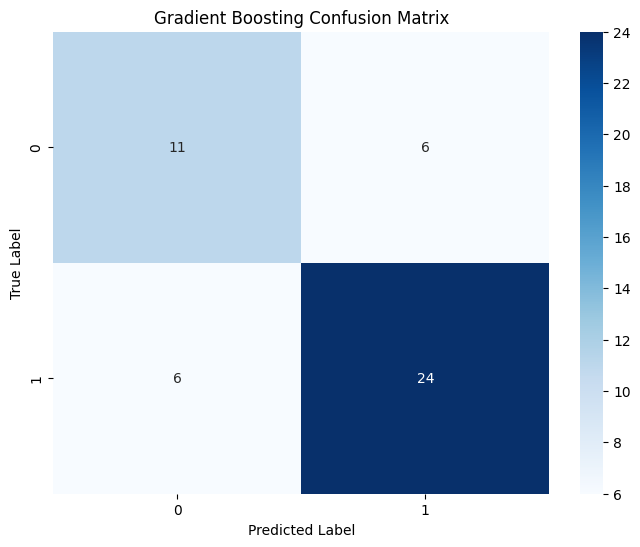

In [6]:
# Evaluate the model
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Gradient Boosting Accuracy: {accuracy:.2f}")
print(f"Gradient Boosting F1-Score: {f1:.2f}")
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Function to make predictions on new data
def predict_movement(new_data):
    """
    Make predictions on new data using the trained Gradient Boosting model
    """
    new_features = new_data[['Close_TSLA', 'polarity_mean', 'polarity_std', 'positive_ratio']]
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('model', GradientBoostingClassifier(random_state=42))
    ])
    model.fit(X, y)
    prediction = model.predict(new_features)
    return prediction

##Conclusion
* The Gradient Boosting Classifier achieved an overall accuracy of 74%, indicating that the model correctly classified 74% of the test samples.
* The F1-Score of 80% for the positive class (1) shows that the model performs better in predicting when the stock price is likely to increase, balancing precision and recall effectively.

#Predicting Stock Prices using LSTM model


This script implements a Bidirectional LSTM model for predicting stock prices using both historical price data and sentiment features. The code includes preprocessing steps, data preparation, model building, training, and visualization of predictions.

### Preparing Data for LSTM


*   Selects features and excludes the target column.
*   Scales the features and target values using MinMaxScaler.
*   Generates sequences of look_back days for LSTM input and aligns them with the target values.







In [ ]:
def prepare_data(data, target_column, look_back=5, include_sentiment=True):
    if include_sentiment:
        features = ['day_of_week','day','month','year','is_weekend','Close_TSLA','price_change_','movement_','polarity_mean','polarity_std','positive_ratio']

    # Remove target column from features if it's in the list
    if target_column in features:
        features.remove(target_column)

    X = data[features].values
    y = data[target_column].values

    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()

    X_scaled = scaler_X.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

    X_sequences = []
    y_sequences = []

    for i in range(len(X_scaled) - look_back):
        X_sequences.append(X_scaled[i:i+look_back])
        y_sequences.append(y_scaled[i+look_back])

    return (np.array(X_sequences), np.array(y_sequences),
            scaler_X, scaler_y)

##Building the LSTM Model


*   Constructs a Bidirectional LSTM model:
1.  Two LSTM layers (64 and 32 units).
2.  Fully connected layers for regression.
*   Compiles the model using the Adam optimizer and Mean Squared Error (mse) loss.


In [ ]:
def build_lstm_model(input_shape, output_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Bidirectional(
            tf.keras.layers.LSTM(64, return_sequences=True),
            input_shape=input_shape
        ),
        tf.keras.layers.Bidirectional(
            tf.keras.layers.LSTM(32)
        ),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(output_shape)
    ])

    model.compile(optimizer='adam', loss='mse')
    return model


###Training and Predicting with LSTM


*   List itemPrepares the dataset for LSTM training using prepare_data.
*   Splits the data into training and testing sets (80%-20%).
*  Trains the model using the training set and evaluates it on the test set.
*  Plots actual vs. predicted values for the test set.


In [ ]:
def train_and_predict_lstm(data, target_column, look_back=5, include_sentiment=True, epochs=50):
    X_seq, y_seq, scaler_X, scaler_y = prepare_data(
        data,
        target_column,
        look_back=look_back,
        include_sentiment=include_sentiment
    )

    X_train, X_test, y_train, y_test = train_test_split(
        X_seq, y_seq, test_size=0.2, random_state=42
    )

    model = build_lstm_model(
        input_shape=(look_back, X_train.shape[2]),
        output_shape=1
    )

    model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=32,
        validation_split=0.2,
        verbose=1
    )

    test_loss = model.evaluate(X_test, y_test)
    predictions = model.predict(X_test).flatten()

    predictions_original = scaler_y.inverse_transform(predictions.reshape(-1, 1)).flatten()
    y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()



   # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_original, label='Actual', color='blue')
    plt.plot(predictions_original, label='Predicted', color='red', linestyle='--')
    plt.title(f'{target_column} Prediction')
    plt.xlabel('Sample Index')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    return {
        'model': model,
        'test_loss': test_loss,
        'predictions': predictions_original,
        'actual': y_test_original
    }

def preprocess_date_features(data):
    # Convert 'Date' column to datetime format
    data['Date'] = pd.to_datetime(data['date'])

    # Extract features from the date
    data['day_of_week'] = data['Date'].dt.dayofweek  # Day of the week (0 = Monday, 6 = Sunday)
    data['day'] = data['Date'].dt.day  # Day of the month
    data['month'] = data['Date'].dt.month  # Month
    data['year'] = data['Date'].dt.year  # Year
    data['is_weekend'] = data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)  # Weekend indicator

    # Optionally drop the original 'Date' column if not needed
    data.drop(columns=['Date'], inplace=True)

    return data



###Main Function
*   Loads the dataset from a CSV file.
*   Preprocesses the data using preprocess_date_features.
*   Trains the LSTM model on the Close_TSLA column (Tesla’s closing price) and evaluates its predictions.

Model for Open Price without sentiment:
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 174ms/step - loss: 0.1375 - val_loss: 0.0540
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0531 - val_loss: 0.0546
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0467 - val_loss: 0.0377
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0339 - val_loss: 0.0326
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0247 - val_loss: 0.0183
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0160 - val_loss: 0.0137
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0096 - val_loss: 0.0082
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0081 - val_loss: 0.0082
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0072 - val_loss: 0.0072
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0071 - val_loss: 0.0062
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0060 - val_loss: 0.0059
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0047 - val_loss: 0.0049
Epoch 13/50

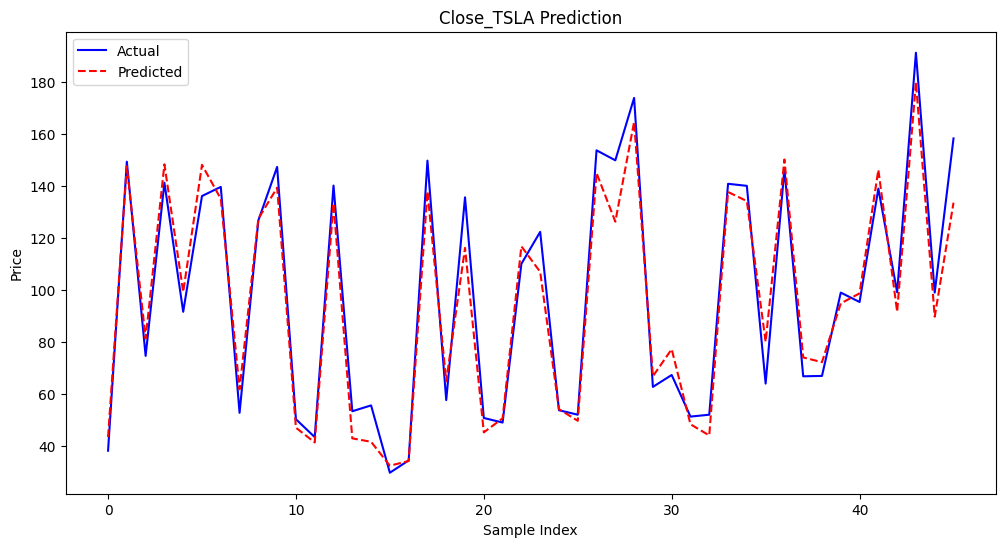

In [ ]:
def main():
    # Load your data
    data = pd.read_csv('/content/mergerd_for_pred.csv')

    data = preprocess_date_features(data)

    # Train separate models for Open and Adj Close
    print("Model for Open Price without sentiment:")
    open_results_with_sentiment = train_and_predict_lstm(
        data, 'Close_TSLA', include_sentiment=True
    )

if __name__ == '__main__':
    main()


##Conclusion

The low loss values indicate that the model successfully minimized the error between actual and predicted prices.
 These results suggest that the inclusion of temporal and sentiment-based features enhances the predictive accuracy, making the model suitable for stock price forecasting.